# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print("Shape of states: ", states.shape)
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
Shape of states:  (2, 24)
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [16]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Let's define a function to watch an agent perform some runs.

In [11]:
def watch_agent(env, brain_name, agent, runs=1):
    scores = []
    for _ in range(runs):
        env_info = env.reset(train_mode=False)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        while True:
            actions = agent.target_act(states)              # get actions from states (no noise)
            env_info = env.step(actions)[brain_name]        # send actions to the environment
            next_states = env_info.vector_observations      # get next states
            rewards = env_info.rewards                      # get rewards
            dones = env_info.local_done                     # see if episode has finished
            score += rewards                                 # update scores
            states = next_states                            # roll over states to next time step
            if np.any(dones):                               # exit loop if episode finished or score is high enough
                break
            if np.max(score) > 3:
                print("Episode score above 3. Quit run.")
                break
        scores.append(np.max(score))
    return scores

Create new DDPG agents.

In [6]:
%load_ext autoreload
%autoreload 2

from multi_agent import DDPGAgent

# the agent name reflects a fixed set of parameters
agent_name = 'test'

agent = DDPGAgent(state_size, action_size)

Train the agent. Save the agent it when it first solves the environment but keep training it for all episodes.

c:\users\mangiantes\appdata\local\conda\conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.016
Episode 200	Average Score: 0.046
Episode 300	Average Score: 0.086
Episode 400	Average Score: 0.117
Episode 500	Average Score: 0.237
Episode 600	Average Score: 0.405
Episode 621	Average Score: 0.515
Environment solved in 521 episodes!	Average Score: 0.52


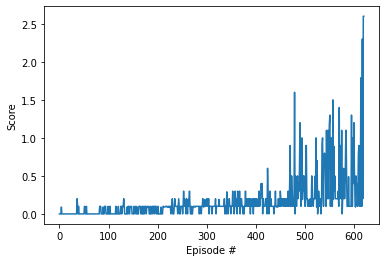

In [7]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

NOISE = 1
NOISE_REDUCTION = 0.9995
EPISODE_PER_UPDATE = 10

def train(agent, n_episodes=1000, max_t=1000):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    solved_ep = 0                      # episode when the agent solved the environment
    
    noise = NOISE
    agent.reset()
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        #print("states from env:", states)
        score = np.zeros(num_agents)
        
        #for t in range(max_t):
        while True:
            actions = agent.act(states, noise)
            #print("actions", actions)
            
            # step forward
            env_info = env.step(actions)[brain_name]   
            next_states = env_info.vector_observations  # get next state for each agent
            rewards = env_info.rewards  # get reward for each agent
            
            dones = env_info.local_done
            
            #print("states before step: ", states)
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            score += rewards
            
            if any(dones):
                #print(f"Done after {t} ticks")
                break 
        
        scores_window.append(np.max(score))
        scores.append(np.max(score))
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)))
        if len(scores_window) == 100 and np.mean(scores_window) >= 0.5:
            solved_ep = i_episode-100
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(solved_ep, np.mean(scores_window)))            
            break
            
        noise = max(noise * NOISE_REDUCTION, 0.01)
            
    # save the fully trained agent
    agent.save(agent_name)
    agent.save(agent_name)
            
    return scores, solved_ep

scores, solved_ep = train(agent, 5000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig(agent_name+'.png')

Watch the trained agent.

In [15]:
agent = DDPGAgent(state_size, action_size)

# load the weights from file
agent.load(agent_name)

# perform some test runs
runs = 3
print(f"Scores for {runs} runs: {watch_agent(env, brain_name, agent, runs)}")
            
env.close()

Scores for 3 runs: [1.4000000208616257, 0.9000000134110451, 0.10000000149011612]
